In [16]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import cumulative_trapezoid
from scipy.signal import find_peaks

# DEFINICION DE INTEGRADOR TEMPORAL
def RK4_FD(eq, fields, parameters, grids, dt, Nt, operators, t_rate): #implementa rouge-kutta
    t_grid = grids[0]
    x_grid = grids[1]
    y_grid = grids[2]
    fields_history = []
    time_grid = []
    for i in range(Nt - 1):
        old_fields = fields
        k_1 = equations_FD(eq, old_fields, t_grid[i], x_grid, y_grid, parameters, operators)
        k_2 = equations_FD(eq, old_fields + 0.5 * dt * k_1, t_grid[i], x_grid, y_grid, parameters, operators)
        k_3 = equations_FD(eq, old_fields + 0.5 * dt * k_2, t_grid[i], x_grid, y_grid, parameters, operators)
        k_4 = equations_FD(eq, old_fields + dt * k_3, t_grid[i], x_grid, y_grid, parameters, operators)
        new_fields = old_fields + dt * (k_1 + 2 * k_2 + 2 * k_3 + k_4) / 6
        fields = new_fields
        if i % t_rate == 0:
            fields_history.append(fields)
            time_grid.append(t_grid[i])
    return fields, fields_history, time_grid

# DEFINICION DE SISTEMA DE ECUACIONES
def equations_FD(eq, field_slices, t_i, x_grid, y_grid, parameters, operators): #ecuaciones
    if eq == "PT_waveguide":
        U = field_slices[0]
        V = field_slices[1]

        [k, gamma_0, d_gamma, omega, beta] = parameters

        gamma = gamma_0 + d_gamma * np.cos(omega * t_i)

        F = 1j * (k * V - gamma * (U / (1 + np.abs(U) ** 2))) + beta * U
        G = 1j * (k * U - gamma * (V / (1 + np.abs(V) ** 2))) - beta * V

        fields = np.array([F, G])
    return fields

In [74]:
 # DEFINICIONES PRELIMINARES

eq = "PT_waveguide"
t_rate = 1

# PARAMETROS (GAMMA = POTENCIAL, K = ACOPLE, ALPHA = GAIN - LOSS)
gamma_0 = 10.0
k = 1.0
beta = 0.0
d_gamma = 0.0
omega = 2.0

R = 0.5

alpha = 1.0
theta = np.arcsin(-beta / k)

# DEFINICIÓN DE GRILLA TEMPORAL, ESPACIAL SE DEFINE COMO ARRAY CERO POR COMO FUNCIONA EL CODIGO
[tmin, tmax, dt] = [0, 300, 0.03]
t_grid = np.arange(tmin, tmax + dt, dt)         # TEMPORAL GRID DEFINITION
x_grid = np.array([0])           # SPATIAL GRID DEFINITION
T = tmax
Nt = t_grid.shape[0]

# CONDICIONES INICIALES EN TERMINOS DE P Y X
U_init = R
V_init = alpha * R * np.exp(- 1j * theta)

# EMPAQUETAMIENTO DE PARAMETROS PARA SIMULACIÓN
operators = [0]
fields_init = [U_init, V_init]
grids = [t_grid, x_grid, 0]
parameters_np = np.array([k, gamma_0, d_gamma, omega, beta])

# SIMULACIÓN NUMERICA
final_fields, fields_history, time_grid = RK4_FD(eq, fields_init, parameters_np, grids, dt, Nt, operators, t_rate)      #NUMERICAL SIMULATION

# REOBTENIENDO DATOS DE SIMULACIÓN
U = np.array(fields_history)[:, 0]
V = np.array(fields_history)[:, 1]
lightness = 1
U_light = U[0::lightness]
V_light = V[0::lightness]
t_light = np.array(time_grid[0::lightness])
P1 = np.abs(U_light) ** 2
P2 = np.abs(V_light) ** 2

Local max (n=0) at x = 0.5600 → value = 6.4466
Local max (n=0) at x = 7.4900 → value = 15.8506
Local min (n=0) at x = 1.0000 → value = 6.3934
Local min (n=1) at x = 1.0000 → value = -8.8930


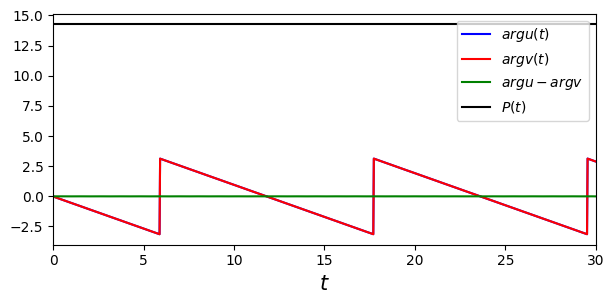

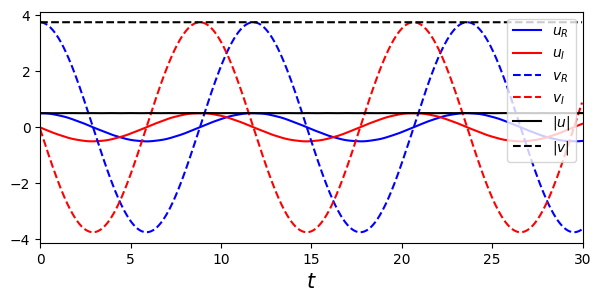

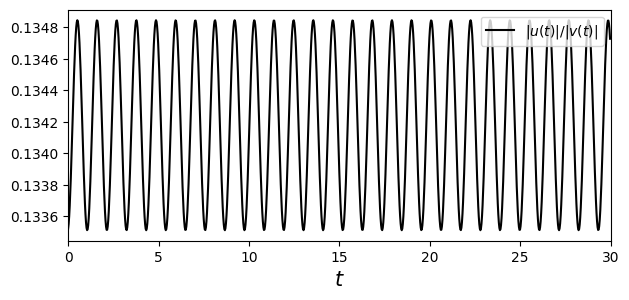

In [75]:
 ############### GENERIC INITIAL AND FINAL TIME ###############
t_init = 0
t_final = 30
i_0 = np.argmin(np.abs(t_light - t_init))
i_f = np.argmin(np.abs(t_light - t_final))

############### GRAFICO DE P1, P2 Y P EN EL TIEMPO ###############

fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.plot(t_light[i_0:i_f], np.angle(U_light)[i_0:i_f], color='b', label="$arg u(t)$")
ax.plot(t_light[i_0:i_f], np.angle(V_light)[i_0:i_f], color='r', label="$arg v(t)$")
ax.plot(t_light[i_0:i_f], np.angle(U_light)[i_0:i_f] - np.angle(V_light)[i_0:i_f], color='g', label="$arg u - arg v$")
ax.plot(t_light[i_0:i_f], P1[i_0:i_f] + P2[i_0:i_f], color='k', label="$P(t)$")
ax.legend(fontsize=10, loc="upper right")
ax.set_xlabel("$t$", fontsize=15)
ax.set_xlim(t_init, t_final)
plt.show()

# REPRODUCE RESULTADOS DE FIG. 4 VICENCIO + CLERC

fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.plot(t_light[i_0:i_f], np.real(U_light[i_0:i_f]), color='b', label="$u_R$")
ax.plot(t_light[i_0:i_f], np.imag(U_light[i_0:i_f]), color='r', label="$u_I$")
ax.plot(t_light[i_0:i_f], np.real(V_light[i_0:i_f]), color='b', label="$v_R$", ls="--")
ax.plot(t_light[i_0:i_f], np.imag(V_light[i_0:i_f]), color='r', label="$v_I$", ls="--")
ax.plot(t_light[i_0:i_f], np.abs(U_light[i_0:i_f]), color='k', label="$|u|$")
ax.plot(t_light[i_0:i_f], np.abs(V_light[i_0:i_f]), color='k', label="$|v|$", ls="--")
ax.legend(fontsize=10, loc="upper right")
ax.set_xlabel("$t$", fontsize=15)
ax.set_xlim(t_init, t_final)
plt.show()

# REPRODUCE RESULTADOS DE FIG. 4 VICENCIO + CLERC

fig, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.plot(t_light[i_0:i_f], np.abs(U_light[i_0:i_f]) / np.abs(V_light[i_0:i_f]), color='k', label="$|u(t)| / |v(t)|$")
ax.legend(fontsize=10, loc="upper right")
ax.set_xlabel("$t$", fontsize=15)
ax.set_xlim(t_init, t_final)
plt.show()